IntSlider(value=0, description='Image Index:', max=91)

Output()

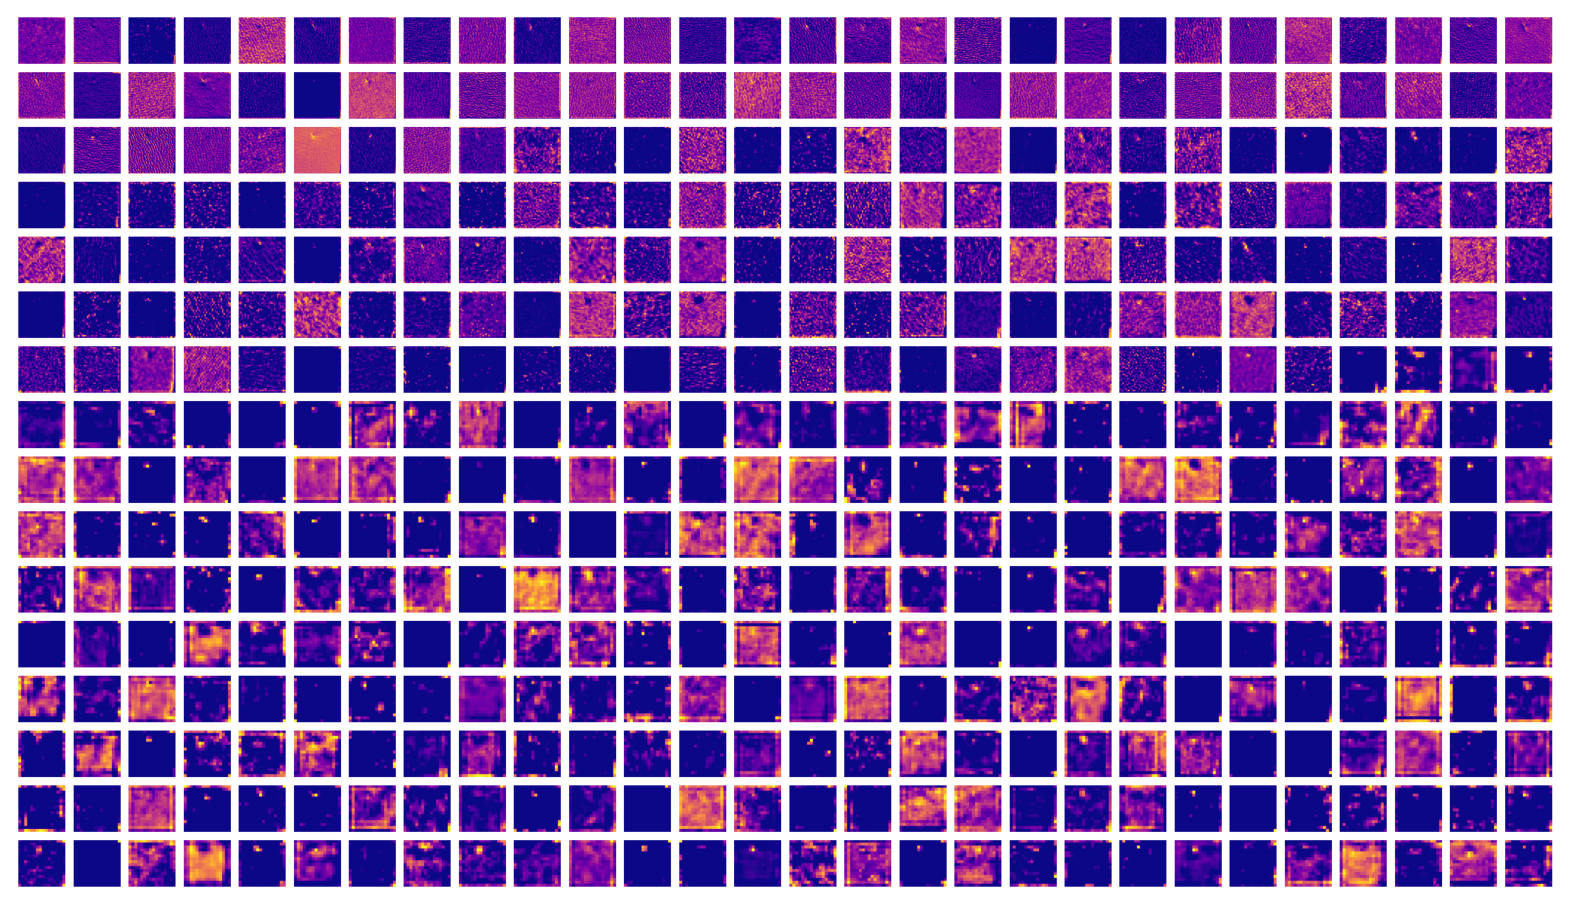

In [5]:
import os
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory containing the images
image_dir = '/home/bule/projects/UTRAD/results/mvtec/featuremap_similarities/leather/'

# Get a list of all PNG files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png') and f.startswith('ano')]

# Function to display an image given its index in the list
def show_image(image_index):
    plt.figure(figsize=(20, 20))
    image_path = os.path.join(image_dir, image_files[image_index])
    image = Image.open(image_path)
    plt.imshow(image)

    plt.axis('off')
    plt.show()

# Create a slider widget
image_slider = widgets.IntSlider(value=0, min=0, max=len(image_files) - 1, step=1, description='Image Index:')

# Create an output widget
output = widgets.Output()

# Define a function to update the output when the slider value changes
def on_slider_change(change):
    with output:
        output.clear_output(wait=True)
        show_image(change['new'])

# Attach the slider change event to the update function
image_slider.observe(on_slider_change, names='value')

# Display the slider and the output widget
display(image_slider, output)

# Display the first image initially
show_image(0)


               category  t_stat_image  p_value_image  t_stat_pixel  \
0                bottle     -5.124539       0.003432     -4.550469   
1                 cable     -9.862447       0.000296     -7.508145   
2               capsule     -3.693821       0.010474     -3.373246   
3                carpet     -7.108075       0.001035    -12.249360   
4                  grid     -4.305754       0.006294     -4.156127   
5              hazelnut     -5.442798       0.002766     -5.564149   
6               leather     -5.191424       0.003277     -4.485001   
7             metal_nut     -9.147430       0.000396     -4.264467   
8                  pill     -7.962233       0.000674     -1.726410   
9                 screw     -1.922108       0.063482     -2.127327   
10                 tile     -4.948654       0.003884     -7.014786   
11           toothbrush     -4.816894       0.004271     -1.462159   
12           transistor     -4.602508       0.005006     -2.469312   
13                 w

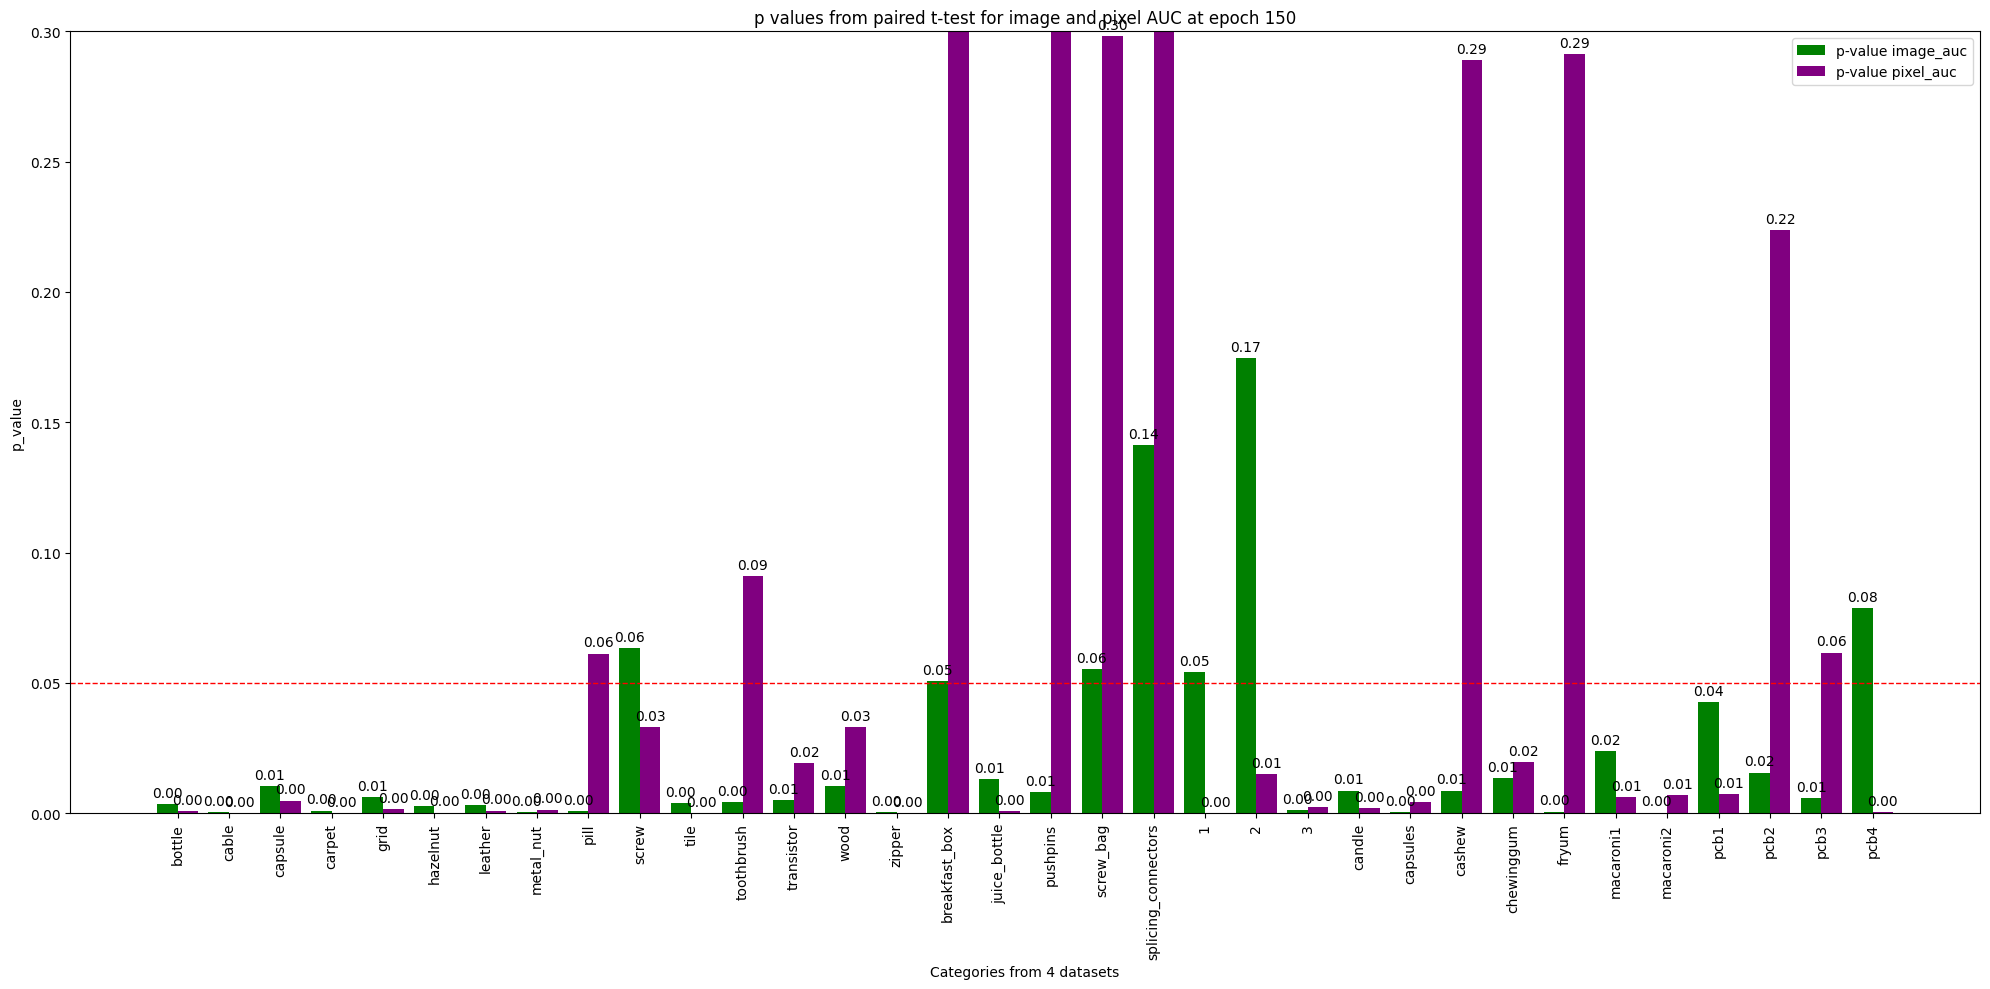

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths
path_list = [
    '/home/bule/projects/UTRAD/results/mvtec/allresults/paired_t_test_data.csv',
    '/home/bule/projects/UTRAD/results/mvtec_loco/allresults/paired_t_test_data.csv',
    '/home/bule/projects/UTRAD/results/beantec/allresults/paired_t_test_data.csv',
    '/home/bule/projects/UTRAD/results/visa/allresults/paired_t_test_data.csv'
]

# Load each CSV into a dataframe and store them in a list
dfs = [pd.read_csv(path) for path in path_list]

# Concatenate all dataframes in the list into one dataframe
concatenated_df = pd.concat(dfs, ignore_index=True)

# Print the concatenated dataframe
print(concatenated_df)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(20, 10))

bar_width = 0.4
index = range(len(concatenated_df['category']))

bars1 = ax.bar([i - bar_width/2 for i in index], concatenated_df['p_value_image'], bar_width, color='green', label='p-value image_auc')
bars2 = ax.bar([i + bar_width/2 for i in index], concatenated_df['p_value_pixel'], bar_width, color='purple', label='p-value pixel_auc')

# Adding the red dashed line at y=0.05
ax.axhline(y=0.05, color='r', linestyle='--', linewidth=1)

# Adding title and labels
ax.set_title('p values from paired t-test for image and pixel AUC at epoch 150')
ax.set_xlabel('Categories from 4 datasets')
ax.set_ylabel('p_value')
ax.set_ylim(0, 0.3)
ax.set_xticks(index)
ax.set_xticklabels(concatenated_df['category'])
ax.tick_params(axis='x', rotation=90)

# Adding legend
ax.legend()

# Adding values on top of the bars, rounded to 4 decimal places
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


               category  t_stat_image  p_value_image  t_stat_pixel  \
0                bottle     -5.124539       0.003432     -4.550469   
1                 cable     -9.862447       0.000296     -7.508145   
2               capsule     -3.693821       0.010474     -3.373246   
3                carpet     -7.108075       0.001035    -12.249360   
4                  grid     -4.305754       0.006294     -4.156127   
5              hazelnut     -5.442798       0.002766     -5.564149   
6               leather     -5.191424       0.003277     -4.485001   
7             metal_nut     -9.147430       0.000396     -4.264467   
8                  pill     -7.962233       0.000674     -1.726410   
9                 screw     -1.922108       0.063482     -2.127327   
10                 tile     -4.948654       0.003884     -7.014786   
11           toothbrush     -4.816894       0.004271     -1.462159   
12           transistor     -4.602508       0.005006     -2.469312   
13                 w

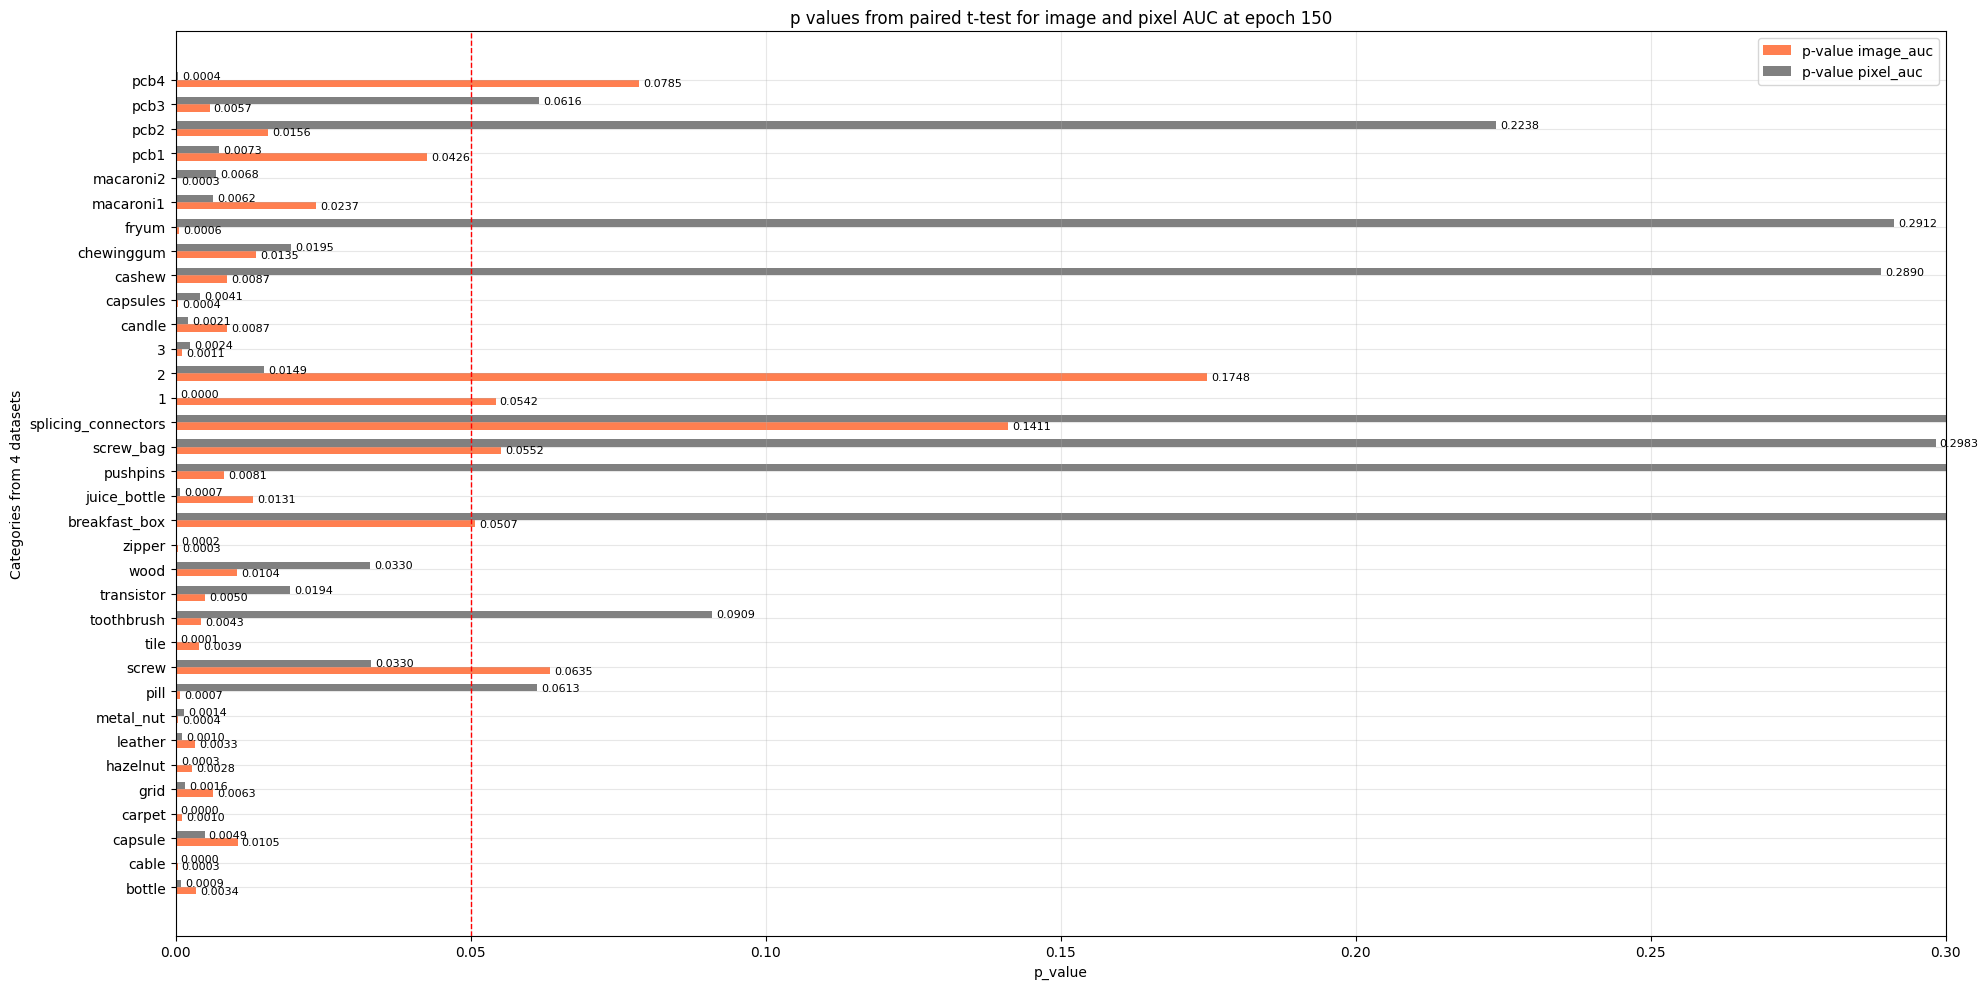

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths
path_list = [
    '/home/bule/projects/UTRAD/results/mvtec/allresults/paired_t_test_data.csv',
    '/home/bule/projects/UTRAD/results/mvtec_loco/allresults/paired_t_test_data.csv',
    '/home/bule/projects/UTRAD/results/beantec/allresults/paired_t_test_data.csv',
    '/home/bule/projects/UTRAD/results/visa/allresults/paired_t_test_data.csv'
]

# Load each CSV into a dataframe and store them in a list
dfs = [pd.read_csv(path) for path in path_list]

# Concatenate all dataframes in the list into one dataframe
concatenated_df = pd.concat(dfs, ignore_index=True)

# Print the concatenated dataframe
print(concatenated_df)

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(20, 10))
plt.grid(alpha=0.3)
bar_height = 0.3
spacing = 0.4
index = [i * (bar_height * 2 + spacing) for i in range(len(concatenated_df['category']))]

bars1 = ax.barh([i - bar_height/2 for i in index], concatenated_df['p_value_image'], bar_height, color='coral', label='p-value image_auc')
bars2 = ax.barh([i + bar_height/2 for i in index], concatenated_df['p_value_pixel'], bar_height, color='grey', label='p-value pixel_auc')

# Adding the red dashed line at x=0.05
ax.axvline(x=0.05, color='r', linestyle='--', linewidth=1)

# Adding title and labels
ax.set_title('p values from paired t-test for image and pixel AUC at epoch 150')
ax.set_ylabel('Categories from 4 datasets')
ax.set_xlabel('p_value')
ax.set_yticks(index)
ax.set_yticklabels(concatenated_df['category'])
ax.tick_params(axis='y', rotation=0)
ax.set_xlim(0, 0.3)
# Adding legend
ax.legend()

# Adding values next to the bars, rounded to 4 decimal places
for bar in bars1:
    width = bar.get_width()
    ax.annotate(f'{width:.4f}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords='offset points',
                ha='left', va='center',
                fontsize=8)  # Smaller font size

for bar in bars2:
    width = bar.get_width()
    ax.annotate(f'{width:.4f}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords='offset points',
                ha='left', va='center',
                fontsize=8)  # Smaller font size

plt.tight_layout()

plt.show()
